In [1]:
from torchvision import models
import prediction
import visualizer
import torch
import train
import model
import numpy as np
import csvLoader as cl
import visualizer as vs
import dataLoader as dl
import torch.nn as nn
from torch.utils.data.sampler import SubsetRandomSampler, SequentialSampler

In [2]:
model_path = './best_model.pt'
resnet_model_path = './best_model_resnet_50.pt'
TRAIN_CSV_PATH = 'facial-keypoints-detection/training/training.csv'
TEST_CSV_PATH = 'facial-keypoints-detection/test/test.csv'

In [3]:
test_csv = cl.load_csv(TEST_CSV_PATH)
csv_allValid, csv_autoFill, csv_missingOnly = cl.clean_csv(test_csv)

test_dataset = dl.FacialKptsDataSet(csv_allValid)
test_sampler =  SubsetRandomSampler(range(len(test_dataset)))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, sampler=test_sampler)

In [4]:
resnet50 = models.resnet50(num_classes=30)
resnet50.inplanes = 96
resnet50.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)

fc_net = model.FullyConnectedNet()

In [5]:
fc_model= prediction.loadModel(model_path, fc_net)
resnet_model = prediction.loadModel(resnet_model_path, resnet50)

Red o for fc net and green x for resnet: 


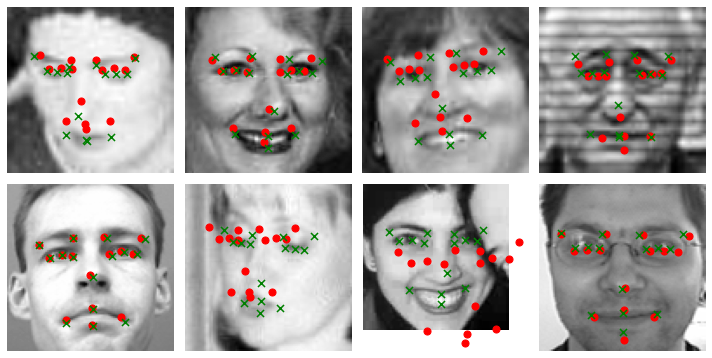

tensor([[62.4191, 38.2908, 28.3543, 37.1000, 55.9870, 38.3899, 68.3035, 38.1693,
         33.7140, 37.5490, 22.3576, 36.3214, 50.4562, 33.0520, 73.0050, 28.7964,
         34.9712, 34.0154, 14.9713, 27.9882, 40.6042, 62.4294, 59.0926, 74.2514,
         33.5458, 73.5590, 45.1153, 76.2871, 45.3590, 76.6969],
        [65.5753, 36.5119, 29.1660, 35.7405, 58.3412, 37.8708, 73.2938, 37.6081,
         36.9314, 37.4355, 21.4230, 36.5508, 59.4918, 29.3174, 78.9516, 30.3867,
         38.1423, 27.7545, 16.9129, 28.5771, 51.2787, 59.3034, 63.4925, 73.1588,
         28.7723, 72.4844, 47.9017, 74.0827, 47.4977, 80.7005],
        [65.9522, 36.3340, 29.9978, 40.5095, 57.8574, 37.5635, 74.1645, 35.8877,
         37.0100, 40.0919, 21.5196, 41.9315, 53.5469, 25.8595, 79.7910, 24.6821,
         38.8121, 28.0892, 15.4818, 31.1420, 45.6529, 57.9194, 68.9357, 73.0217,
         32.0258, 77.0052, 49.5206, 72.8834, 50.0952, 78.7899],
        [63.2640, 38.1486, 30.0226, 37.4608, 56.9137, 37.6775, 70.5032, 38.9229

In [6]:
image, _ = next(iter(test_loader))
pred = prediction.predict(fc_model, image, None, vis=False)
print('Red o for fc net and green x for resnet: ')
prediction.predict(resnet_model, image, None, comp_kpts=pred)
# Red o for fc net and green x for resnet

In [7]:
TRAIN_CSV_PATH = 'facial-keypoints-detection/training/training.csv'
TEST_CSV_PATH = 'facial-keypoints-detection/test/test.csv'

USE_GPU, device = train.check_GPU()
print('GPU mode: {}'.format(USE_GPU))

train_csv = cl.load_csv(TRAIN_CSV_PATH)

print(f'Len of train csv: {len(np.array(train_csv.Image))}')
csv_allValidTrain, csv_autoFillTrain, _ = cl.clean_csv(train_csv)

print('Loading Dataset...')
train_dataset = dl.FacialKptsDataSet(csv_autoFillTrain)

_, autoFillVal = dl.getTrainValidationDataSet(csv_autoFillTrain, 0.85)
print('Loading validation set...')
val_dataset = dl.FacialKptsDataSet(autoFillVal)

# Init sampler and loader
val_sampler = SubsetRandomSampler(range(len(val_dataset)))
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, sampler=val_sampler)

GPU mode: True
Len of train csv: 7049
Loading Dataset...
Loading validation set...


Resnet Predictions: 


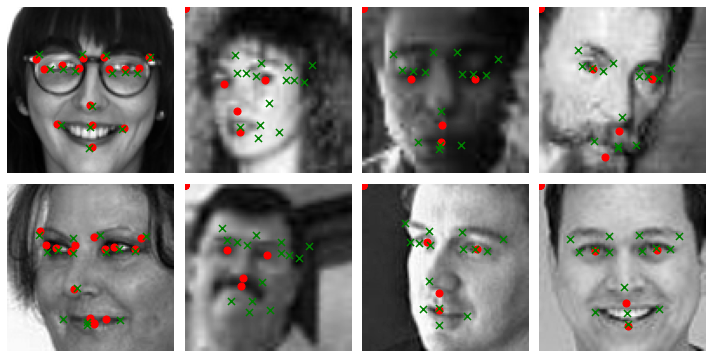

FC Net Predictions: 


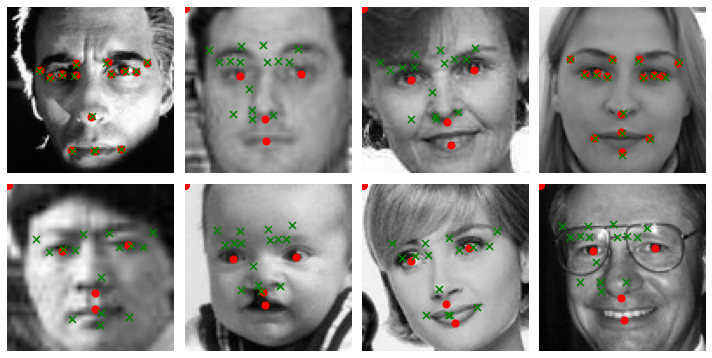

tensor([[67.5526, 36.1127, 31.0263, 38.9945, 59.5646, 38.1206, 73.8783, 36.4029,
         37.9628, 39.5276, 24.2101, 40.4129, 56.5915, 32.0716, 80.0100, 31.0992,
         39.1349, 33.0801, 17.7909, 36.3719, 48.4255, 62.3099, 64.9855, 81.4651,
         36.7655, 82.3426, 49.7331, 81.8754, 49.9117, 82.4696],
        [53.2504, 30.3804, 25.7941, 30.3645, 46.9979, 31.2030, 59.7397, 31.1064,
         31.2607, 31.2386, 19.2729, 31.1414, 44.6028, 21.6385, 65.0741, 23.5664,
         31.9835, 22.0545, 13.8643, 24.1694, 36.9386, 46.9156, 50.6407, 61.6469,
         27.2149, 61.4172, 38.1850, 58.9687, 38.4266, 63.9950],
        [52.5860, 29.7605, 22.4900, 34.1888, 46.6374, 31.6203, 59.6174, 29.5761,
         29.4475, 33.9946, 15.7416, 36.1009, 44.5723, 24.2013, 64.8440, 23.4089,
         29.9010, 26.5965,  9.8797, 31.1913, 39.8905, 48.4174, 55.2260, 60.2411,
         27.6817, 64.3028, 41.4543, 62.5598, 42.1492, 64.3160],
        [65.6664, 39.4532, 32.3768, 38.5913, 59.5790, 40.3586, 72.3171, 39.9497

In [8]:
print('Resnet Predictions: ')
image, kpts = next(iter(val_loader))
prediction.predict(resnet_model, image, kpts)

print('FC Net Predictions: ')
image, kpts = next(iter(val_loader))
prediction.predict(fc_model, image, kpts)

In [9]:
# All Valid
_, allValidVal = dl.getTrainValidationDataSet(csv_allValidTrain, 0.85)
print('Loading validation set...')
val_allValid_dataset = dl.FacialKptsDataSet(allValidVal)

# Init sampler and loader
val_allValid_sampler = SubsetRandomSampler(range(len(val_allValid_dataset)))
val_allValid_loader = torch.utils.data.DataLoader(val_allValid_dataset, batch_size=8, sampler=val_allValid_sampler)

Loading validation set...


Resnet Predictions: 


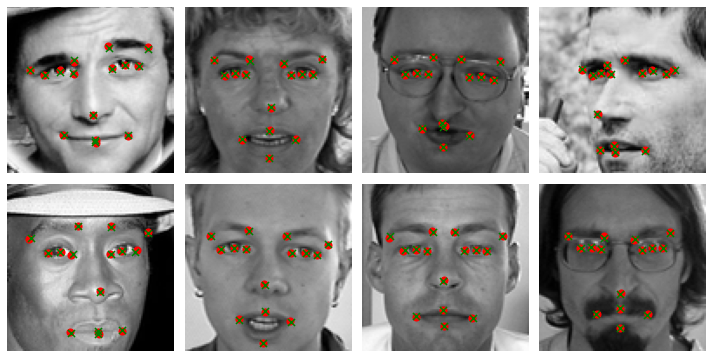

FC Net Predictions: 


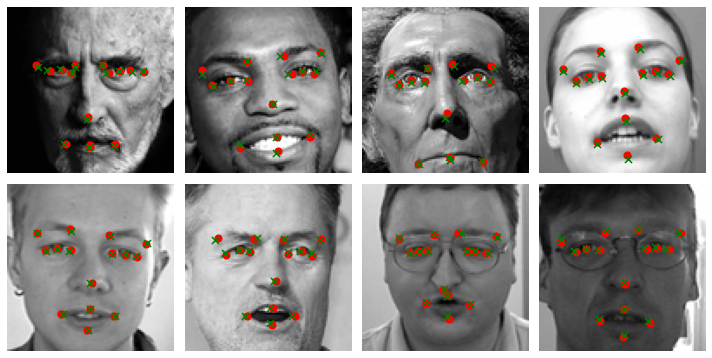

tensor([[63.8931, 36.1220, 29.7431, 35.4156, 56.5324, 37.7806, 71.6594, 37.0588,
         37.1060, 37.3695, 22.6582, 35.8481, 54.0541, 32.9364, 78.0035, 36.5676,
         38.6011, 33.9162, 17.1251, 33.8252, 45.7585, 63.9395, 61.0186, 79.7351,
         32.4049, 78.7236, 46.4045, 80.4688, 46.6186, 80.3268],
        [66.9880, 36.4095, 25.9234, 41.9542, 59.2514, 37.9642, 75.5251, 36.6033,
         34.8570, 41.3682, 15.9749, 45.1414, 54.4834, 27.9650, 78.4250, 25.9047,
         35.4410, 30.8894,  9.5278, 37.8867, 50.3530, 55.1567, 72.1064, 72.8693,
         31.4071, 79.1029, 51.9947, 74.2973, 52.5074, 83.8542],
        [65.7431, 40.6072, 27.8500, 42.6081, 57.4351, 42.2690, 72.6109, 41.9797,
         35.4371, 43.3176, 20.8573, 44.5663, 52.5147, 33.6452, 75.5753, 34.8417,
         37.3717, 34.6095, 16.6138, 38.5361, 47.5713, 63.3201, 68.7436, 88.0627,
         32.7265, 90.0979, 49.7378, 85.7714, 50.4054, 87.4569],
        [67.3031, 37.6250, 28.0381, 40.7885, 59.2470, 38.5231, 75.1366, 39.0900

In [10]:
print('Resnet Predictions: ')
image, kpts = next(iter(val_allValid_loader))
prediction.predict(resnet_model, image, kpts)

print('FC Net Predictions: ')
image, kpts = next(iter(val_allValid_loader))
prediction.predict(fc_model, image, kpts)